In [9]:
import json
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import bigrams 
import re
import string
from collections import Counter
 
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens


# i = 0

# with open('python.json', 'r')as f:
#     for line in f:
#         line = line.strip()
#         if line:
#             tweet = json.loads(line)
#             tweet_text = tweet['text']
#             tokens = preprocess(tweet_text)

#             print(i)
#             i += 1
#             print(tweet_text)
#             print(word_tokenize(tweet_text))
#             print(tokens)

punctuation = list(string.punctuation)
stop = stopwords.words('english') + stopwords.words('spanish') + punctuation + ['rt', 'via']


i = 0

with open('AtletiFCB.json', 'r') as f:
    count_all = Counter()
    for line in f:
        line = line.strip()
        if line:
            i += 1
            tweet = json.loads(line)
            if 'text' in tweet:
                tweet_text = tweet['text']
                tokens = preprocess(tweet_text)
                # Create a list with all the terms without stop words
                terms_all = [term for term in tokens if term not in stop]
#                 put things in context by bigrams
#                 terms_bigram = bigrams(terms_all)
            # Update the counter
                count_all.update(terms_all)
    # Print the first 5 most frequent words
    print(count_all.most_common(100))
    print(i)


[('¡', 90379), ('#AtletiFCB', 76970), ('RT', 50479), ('#UCL', 23355), ('0', 22374), ('2', 17769), ('…', 16879), ('@Atleti', 16847), ('#AúpaAtleti', 14923), ('1', 13887), ('ça', 9126), ('@AntoGriezmann', 8116), ('@FCBarcelona', 7174), ('VAMOS', 6957), ('Bar', 6892), ('#FCBlive', 6836), ('😂', 5900), ('Griezmann', 5800), ('ético', 5040), ('ón', 4486), ('Atl', 4432), ('35', 4286), ('FINAL', 4285), ('cabeza', 4166), ('SE', 4055), ('est', 4038), ('semifinales', 4015), ('95', 3951), ('é', 3945), ('ó', 3943), ('Ó', 3880), ('EQUIPO', 3835), ('GOOOL', 3832), ('GOOOOOOLL', 3831), ('https://t.co/NBQOYrjLFc', 3817), ('Estamos', 3698), ('ACAB', 3681), ('https://t.co/9ox2', 3670), ('87', 3320), ('penalti', 3301), ('pour', 3278), ('7', 3200), ('à', 3187), ('Calder', 3130), ('El', 3124), ('Barcelona', 3016), ('GOOOOOOOL', 2850), ('Marc', 2836), ('pas', 2834), ('https://t.co/Q1D0J56yeq', 2821), ('Madrid', 2664), ('qui', 2587), ('Messi', 2479), ('Vamos', 2436), ('ne', 2342), ('agg', 2189), ('3', 2169), (

In [70]:
stop += string.digits

with open('AtletiFCB.json', 'r') as f:
    count_all = Counter()
    for line in f:
        line = line.strip()
        if line:
            i += 1
            tweet = json.loads(line)
            if 'text' in tweet:
                tweet_text = tweet['text']
                tokens = preprocess(tweet_text)
                # Create a list with all the terms without stop words
                terms_all = [term for term in tokens if term not in stop]
                # Count terms only (no hashtags, no mentions)
                terms_only = [term for term in terms_all if  not term.startswith(('#', '@'))]
                
            # Update the counter
                count_all.update(terms_only)
    # Print the first 5 most frequent words
    print(count_all.most_common(100))
    print(i)

[('¡', 90379), ('RT', 50479), ('…', 16879), ('ça', 9126), ('VAMOS', 6957), ('Bar', 6892), ('😂', 5900), ('Griezmann', 5800), ('ético', 5040), ('ón', 4486), ('Atl', 4432), ('35', 4286), ('FINAL', 4285), ('cabeza', 4166), ('SE', 4055), ('est', 4038), ('semifinales', 4015), ('95', 3951), ('é', 3945), ('ó', 3943), ('Ó', 3880), ('EQUIPO', 3835), ('GOOOL', 3832), ('GOOOOOOLL', 3831), ('https://t.co/NBQOYrjLFc', 3817), ('Estamos', 3698), ('ACAB', 3681), ('https://t.co/9ox2', 3670), ('87', 3320), ('penalti', 3301), ('pour', 3278), ('à', 3187), ('Calder', 3130), ('El', 3124), ('Barcelona', 3016), ('GOOOOOOOL', 2850), ('Marc', 2836), ('pas', 2834), ('https://t.co/Q1D0J56yeq', 2821), ('Madrid', 2664), ('qui', 2587), ('Messi', 2479), ('Vamos', 2436), ('ne', 2342), ('agg', 2189), ('Barca', 2153), ('0,', 2142), ('et', 2098), ('il', 1962), ("c'est", 1886), ('du', 1881), ('Luis', 1872), ('Iniesta', 1821), ('gol', 1801), ('⚽', 1771), ('Atletico', 1728), ('éliminé', 1722), ('PSG', 1702), ('Suárez', 1645)

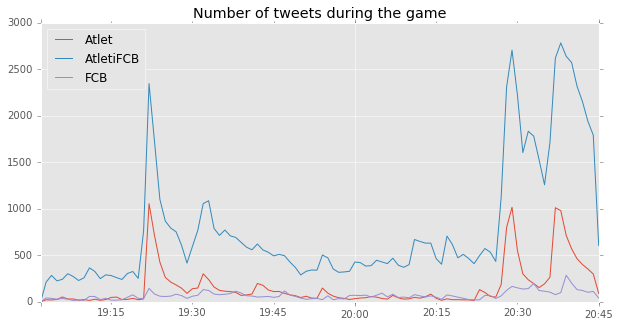

In [4]:
import pandas
 
# still need to tell IPython to display plots within the notebook
%matplotlib inline
# this is not strictly necessary, it just improves the style of the Matplotlib plots
import matplotlib
matplotlib.style.use("ggplot")

timestamp= []
# a list of "1" or "0"to count the tweets
timestamp_AtletiFCB = []
timestamp_Atleti = []
timestamp_FCB = []

with open('AtletiFCB.json', 'r') as f:
    for line in f:
        line = line.strip()
        if line:
            tweet = json.loads(line)
            if 'text' in tweet:
                tweet_text = tweet['text']
                tweet_time = tweet['created_at']
                tokens = preprocess(tweet_text)
                terms_all = [term for term in tokens if term not in stop]
                
                timestamp.append(tweet_time)
                timestamp_AtletiFCB.append(1)
                
                if '@Atleti' in terms_all:
                    timestamp_Atleti.append(1)
                else: 
                    timestamp_Atleti.append(0)
                    
                if '@FCBarcelona' in terms_all:
                    timestamp_FCB.append(1)
                else:
                    timestamp_FCB.append(0)
                

# the index of the DataFrame
idx_AtletiFCB = pandas.DatetimeIndex(timestamp)

all_data = dict(Atlet=timestamp_Atleti,AtletiFCB=timestamp_AtletiFCB,FCB=timestamp_FCB)

AtletiFCB = pandas.DataFrame(data=all_data,
                               index=idx_AtletiFCB)
#  Resampling
AtletiFCB =  AtletiFCB.resample('1Min', how='sum').fillna(0)
p = AtletiFCB.plot(title="Number of tweets during the game",figsize=(10,5))




# idx_Atleti = pandas.DatetimeIndex(timestamp_Atleti)
# # the actual series (at series of 1s for the moment)
# Atleti = pandas.Series(ones, index=idx_Atleti)

# idx_FCB = pandas.DatetimeIndex(timestamp_FCB)
# # the actual series (at series of 1s for the moment)
# FCB = pandas.Series(ones, index=idx_FCB)

# # all the data together
# match_data = dict(timestamp_AtletiFCB=idx_AtletiFCB, timestamp_Atleti=idx_Atleti, timestamp_FCB=idx_FCB)
# # we need a DataFrame, to accommodate multiple series
# all_matches = pandas.DataFrame(data=match_data,
#                                index=idx_AtletiFCB.index)
# # Resampling as above
# all_matches = all_matches.resample('1Min', how='sum').fillna(0)
 







# p = all_matches.plot(title="Number of tweets during the game",figsize=(10,5))







In [10]:
AtletiFCB = pandas.DataFrame(data=all_data,
                               index=idx_AtletiFCB)
#  Resampling
# AtletiFCB =  AtletiFCB.resample('1Min', how='sum').fillna(0)
AtletiFCB

,Atlet,AtletiFCB,FCB
2016-04-13 19:03:15,0,1,1
2016-04-13 19:03:16,0,1,0
2016-04-13 19:03:16,1,1,0
2016-04-13 19:03:16,0,1,0
2016-04-13 19:03:16,0,1,1
2016-04-13 19:03:16,0,1,0
2016-04-13 19:03:16,0,1,0
2016-04-13 19:03:16,0,1,0
2016-04-13 19:03:16,0,1,0
2016-04-13 19:03:17,1,1,0


[('#AtletiFCB', 76970), ('#UCL', 23355), ('@Atleti', 16847), ('#AúpaAtleti', 14923), ('@AntoGriezmann', 8116), ('@FCBarcelona', 7174), ('#FCBlive', 6836), ('#Atleti', 1940), ('@WinamaxSport', 1860), ('#FCBLive', 1667)]


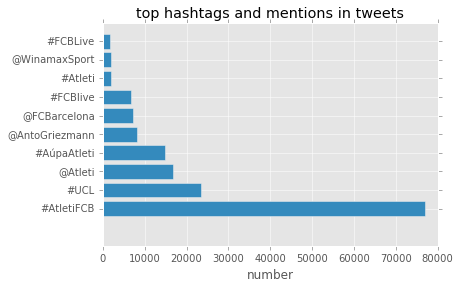

In [131]:
with open('AtletiFCB.json', 'r') as f:
    count_all = Counter()
    for line in f:
        line = line.strip()
        if line:
            tweet = json.loads(line)
            if 'text' in tweet:
                tweet_text = tweet['text']
                tokens = preprocess(tweet_text)

                # Count hashtags and mentions only
                terms_hash_mention = [term for term in tokens if term.startswith(('#', '@'))]
                
            # Update the counter
                count_all.update(terms_hash_mention)
    # Print the first 5 most frequent words
    print(count_all.most_common(10))
    

import numpy as np
import matplotlib.pyplot as plt

data_bar = count_all.most_common(10)

entities = []
numbers = []


for data in data_bar:
    entities.append(data[0])
    numbers.append(data[1])

y_pos = np.arange(len(entities))

# create a new figure
plt.figure()
# set up the bar chart
plt.barh(y_pos, numbers, align='center')
plt.yticks(y_pos, entities)
plt.xlabel("number")
plt.title("top hashtags and mentions in tweets")
plt.figsize=(10,5)

In [135]:

j = 0
geometry = []
with open('AtletiFCB.json', 'r') as f:
#     count_all = Counter()
    for line in f:
        line = line.strip()
        if line:
            tweet = json.loads(line)
            if 'text' in tweet:
                if tweet['coordinates']:
                    geometry.append(tweet['coordinates'])
                    j +=1
                      
print(j)
print(geometry[0])



#                 tweet_text = tweet['text']
#                 tokens = preprocess(tweet_text)

#                 # Count hashtags and mentions only
#                 terms_hash_mention = [term for term in tokens if term.startswith(('#', '@'))]
                
#             # Update the counter
#                 count_all.update(terms_hash_mention)
#     # Print the first 5 most frequent words
#     print(count_all.most_common(10))
    


122
{'coordinates': [-70.6479, -33.463], 'type': 'Point'}


In [140]:

longitude = []
latitude = []
for coordinate in geometry:
    longitude.append(coordinate['coordinates'][0])
    latitude.append(coordinate['coordinates'][1])

# print(longitude)    
# print(latitude)    


# Import the basemap package
from mpl_toolkits.basemap import Basemap

# Create a map on which to draw.  We're using a mercator projection, and showing the whole world.
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
# Draw coastlines, and the edges of the map.
m.drawcoastlines()
m.drawmapboundary()
# Convert latitude and longitude to x and y coordinates
x, y = m(list(longitude.astype(float)), list(latitude.astype(float)))
# Use matplotlib to draw the points onto the map.
m.scatter(x,y,1,marker='o',color='red')
# Show the plot.
plt.show()

ImportError: No module named 'mpl_toolkits.basemap'